In [851]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from matplotlib import style
style.use('seaborn-whitegrid')
import pandas as pd 
import numpy as np
# plt.figure(figsize=(20, 10))
plt.rcParams["figure.figsize"] = (10,7)


In [852]:
data = pd.read_csv('D:/STUDY/4.GIS/G I S 4.2/0.Project/ModelsAlgorithmsCodes/6.Accurcay Assesment/LSAT/Correlation2015LSAT.csv', index_col = 0)
data.shape
data.dropna(inplace = True)
data.head(3)

,X,Y,MODIS LSAT (Reference),L8 LSAT Estimates
FID,,,,
0,34.6883,-0.13600,30.826229,28.672397
1,34.8431,-0.28705,32.192482,27.782982
2,34.6333,-0.33787,28.771219,24.716781


In [853]:
# Correlation Co-efficient
data.corr()

,X,Y,MODIS LSAT (Reference),L8 LSAT Estimates
X,1.000000,0.074679,-0.052403,0.008026
Y,0.074679,1.000000,0.014568,0.098822
MODIS LSAT (Reference),-0.052403,0.014568,1.000000,0.666916
L8 LSAT Estimates,0.008026,0.098822,0.666916,1.000000


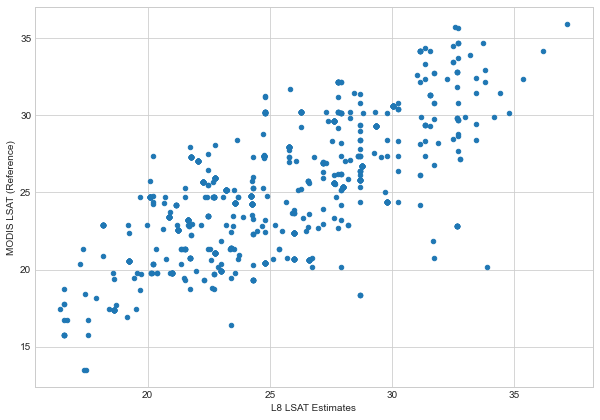

In [854]:
data.plot(kind='scatter', x = "L8 LSAT Estimates", y="MODIS LSAT (Reference)")
plt.show()

In [855]:

# change to df
estimates = pd.DataFrame(data["MODIS LSAT (Reference)"])
reference = pd.DataFrame(data["L8 LSAT Estimates"])

In [856]:
#Build linear model
lm = linear_model.LinearRegression()
model = lm.fit(estimates, reference)

In [857]:
model.coef_

array([[0.66412393]])

In [858]:
model.intercept_

array([8.49469072])

In [859]:
# Model Evaluation
model.score(estimates, reference)

0.4447775352124099

In [860]:
# Predict new value of price
estimatesNew = 26
estimatesNew = np.array(estimatesNew).reshape(1, -1)
estimatesPred = model.predict(estimatesNew)
estimatesPred

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[25.76191299]])

In [861]:
# Predict more values
X = ([31.4241199, 28.3])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis = 1, keys = ['estimatesNew', 'estimatesPred'])
df

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,estimatesNew,estimatesPred
,0,0
0,31.42412,29.364201
1,28.30000,27.289398


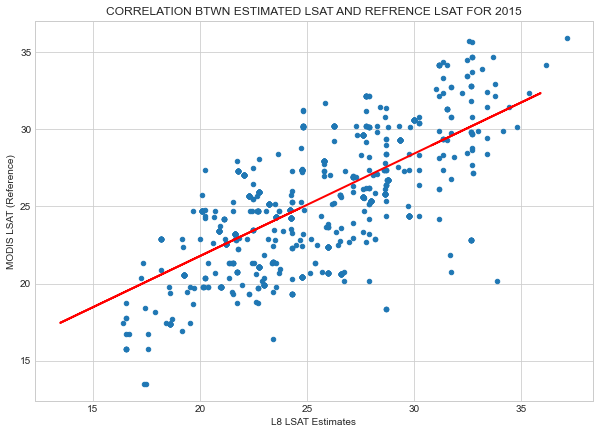

In [862]:
# Visualize the results

#data.plot(kind = "scatter", x = 'L8 Chl-a Estimates', y = "S3 OLCI Chl-a (Reference)")
data.plot(kind = "scatter", x = 'L8 LSAT Estimates', y = "MODIS LSAT (Reference)")
# Regression line
plt.plot(estimates, model.predict(estimates), color = "red", linewidth = 2)
#plt.legend(loc='best',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title("CORRELATION BTWN ESTIMATED LSAT AND REFRENCE LSAT FOR 2015")
plt.show()